### Fraud Detection & Anomaly Detection

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data= pd.read_csv("data/fraudTrain.csv")

In [39]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [41]:
num_columns = data.select_dtypes(include='number').columns
pd.DataFrame(num_columns)

,0
0,Unnamed: 0
1,cc_num
2,amt
3,zip
4,lat
5,long
6,city_pop
7,unix_time
8,merch_lat
9,merch_long


In [42]:
data = data[num_columns]
data.drop("Unnamed: 0",axis=1,inplace=True)
data


C:\Users\danrl\AppData\Local\Temp\ipykernel_9592\3691109328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("Unnamed: 0",axis=1,inplace=True)


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


# Credit Card Fraud Detection - Artificial Neural Networks

In [43]:
features_train = data.iloc[:, :-1]
targets_train = data.iloc[:,-1]

In [44]:
print(features_train.shape)
print(targets_train.shape)
features_train

(1296675, 9)
(1296675,)


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160


In [45]:
targets_train.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_train_sclr = pd.DataFrame(
    scaler.fit_transform(features_train),
    columns=features_train.columns
)

features_train_sclr.shape[1]

9

In [47]:
features_train_sclr

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,-0.316692,-0.407826,-0.749136,-0.484420,0.657620,-0.282589,-1.858664,-0.494354,0.593864
1,-0.318757,0.230039,1.872567,2.039120,-2.033870,-0.293670,-1.858662,2.078699,-2.030341
2,-0.318728,0.934149,1.281042,0.717754,-1.601537,-0.280406,-1.858662,0.902849,-1.592323
3,-0.316058,-0.158132,0.402753,1.515617,-1.590766,-0.287742,-1.858660,1.662886,-1.621848
4,-0.318471,-0.177094,-0.906090,-0.023035,0.782279,-0.293835,-1.858651,0.026941,0.841909
...,...,...,...,...,...,...,...,...,...
1296670,-0.318735,-0.341769,1.336186,-0.161575,-1.617214,-0.293309,1.757855,-0.331926,-1.558650
1296671,-0.314165,-0.116339,-1.004368,0.143638,0.924207,-0.293832,1.757855,0.072321,0.869934
1296672,-0.316072,0.221930,1.469677,-1.102883,-1.133257,-0.291186,1.757856,-0.962433,-1.082272
1296673,-0.316680,0.028375,0.332996,0.948613,-0.895029,-0.290434,1.757861,0.832051,-0.945074


In [48]:
from keras import models, layers, regularizers, optimizers

def create_model(input_shape):
    model = models.Sequential([
        layers.Dense(64, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

model = create_model((features_train.shape[1],))  # Novo modelo a cada iteração
model.summary()

c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

## SMOTE - Oversampling

In [50]:
from imblearn.over_sampling import SMOTE

# Aplicando SMOTE para oversampling da classe minoritária
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(features_train_sclr, targets_train)

print(f"Tamanho original de X_train: {features_train_sclr.shape}")
print(f"Tamanho após SMOTE: {X_train_res.shape}")

c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Tamanho original de X_train: (1296675, 9)
Tamanho após SMOTE: (2578338, 9)


In [51]:
y_train_res.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [52]:
features_train_sclr = X_train_res
targets_train = y_train_res

In [53]:
targets_train.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

## Cross-Validation

In [54]:
from keras import models, layers
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Calculando os pesos das classes
#class_weights = compute_class_weight('balanced', classes=[0, 1], y=targets_train)      
#class_weight_dict = {0: class_weights[0], 1: class_weights[1]}                     
# class_weight_dict = {0: 1., 1: 100.}                class_weight=class_weight_dict,

# Callbacks:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
checkpoint = ModelCheckpoint(
    'model_checkpoint.keras',  # Salva no formato .keras
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Cross-Validation settings
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # The folds are made by preserving the percentage of samples for each class.
fold_no = 1
accuracy_per_fold = []
loss_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_score_per_fold = []

# Looping to folds
for train_index, val_index in kfold.split(features_train_sclr, targets_train):
    # Spreanding the data into training and validation
    X_train, X_val = features_train_sclr.iloc[train_index], features_train_sclr.iloc[val_index]
    y_train, y_val = targets_train.iloc[train_index], targets_train.iloc[val_index]

    # Creating the model for each fold
    model = create_model((X_train.shape[1],)) # Calling the model created before

    # Training the model
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=256,
        validation_data=(X_val, y_val),
        verbose=1, # Setting the model fitting visualization
        callbacks=[early_stopping, lr_scheduler, checkpoint]
    )

    # Evaluating the model to this fold
    scores = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}")
    accuracy_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])

    # Predicting on validation set
    y_val_pred = (model.predict(X_val) > 0.5).astype("int32")  # Binarize predictions

    # Calculating Precision, Recall, and F1 Score for this fold
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    precision_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_score_per_fold.append(f1)

    print(f"Fold {fold_no} - Precision: {precision:.4f} - Recall: {recall:.4f} - F1 Score: {f1:.4f}")

    fold_no += 1

# Final Results
print("\nResultados da Validação Cruzada:")
print(f"Acurácia média: {np.mean(accuracy_per_fold):.4f}")
print(f"Perda média: {np.mean(loss_per_fold):.4f}")
print(f"Precisão média: {np.mean(precision_per_fold):.4f}")
print(f"Recall médio: {np.mean(recall_per_fold):.4f}")
print(f"F1 Score médio: {np.mean(f1_score_per_fold):.4f}")

Epoch 1/5


c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8058/8058 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8333 - loss: 0.4327 - val_accuracy: 0.8637 - val_loss: 0.3254 - learning_rate: 0.0010
Epoch 2/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8589 - loss: 0.3541 - val_accuracy: 0.8654 - val_loss: 0.2987 - learning_rate: 0.0010
Epoch 3/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8599 - loss: 0.3428 - val_accuracy: 0.8840 - val_loss: 0.2887 - learning_rate: 0.0010
Epoch 4/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8597 - loss: 0.3380 - val_accuracy: 0.8641 - val_loss: 0.2834 - learning_rate: 0.0010
Epoch 5/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 59s 7ms/step - accuracy: 0.8591 - loss: 0.3346 - val_accuracy: 0.8641 - val_loss: 0.2921 - learning_rate: 0.0010
Fold 1 - Loss: 0.2833758592605591 - Accuracy: 0.8640598058700562
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step
Fold 1 - Precision: 0.9671 - Recall: 0.7537 - F1 Score: 0.8472


c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - accuracy: 0.8336 - loss: 0.4364 - val_accuracy: 0.8645 - val_loss: 0.3202 - learning_rate: 0.0010
Epoch 2/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.8605 - loss: 0.3555 - val_accuracy: 0.8641 - val_loss: 0.3068 - learning_rate: 0.0010
Epoch 3/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8604 - loss: 0.3487 - val_accuracy: 0.8648 - val_loss: 0.3015 - learning_rate: 0.0010
Epoch 4/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8628 - loss: 0.3428 - val_accuracy: 0.8675 - val_loss: 0.2863 - learning_rate: 0.0010
Epoch 5/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8633 - loss: 0.3369 - val_accuracy: 0.8638 - val_loss: 0.2860 - learning_rate: 0.0010
Fold 2 - Loss: 0.2860395014286041 - Accuracy: 0.863846480846405
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step
Fold 2 - Precision: 0.9609 - Recall: 0.7585 - F1 Score: 0.8478
Epoch 1/5


c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8058/8058 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8356 - loss: 0.4289 - val_accuracy: 0.8646 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 2/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8604 - loss: 0.3491 - val_accuracy: 0.8829 - val_loss: 0.2945 - learning_rate: 0.0010
Epoch 3/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8620 - loss: 0.3393 - val_accuracy: 0.8872 - val_loss: 0.2889 - learning_rate: 0.0010
Epoch 4/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.8636 - loss: 0.3342 - val_accuracy: 0.8906 - val_loss: 0.2903 - learning_rate: 0.0010
Epoch 5/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.8640 - loss: 0.3309 - val_accuracy: 0.8935 - val_loss: 0.2776 - learning_rate: 0.0010
Fold 3 - Loss: 0.27755117416381836 - Accuracy: 0.8935225605964661
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step
Fold 3 - Precision: 0.8945 - Recall: 0.8922 - F1 Score: 0.8934


c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 87s 10ms/step - accuracy: 0.8385 - loss: 0.4247 - val_accuracy: 0.8657 - val_loss: 0.3180 - learning_rate: 0.0010
Epoch 2/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.8616 - loss: 0.3528 - val_accuracy: 0.8656 - val_loss: 0.3101 - learning_rate: 0.0010
Epoch 3/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - accuracy: 0.8619 - loss: 0.3464 - val_accuracy: 0.8658 - val_loss: 0.3061 - learning_rate: 0.0010
Epoch 4/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.8622 - loss: 0.3451 - val_accuracy: 0.8658 - val_loss: 0.2939 - learning_rate: 0.0010
Epoch 5/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 51s 6ms/step - accuracy: 0.8622 - loss: 0.3443 - val_accuracy: 0.8658 - val_loss: 0.3052 - learning_rate: 0.0010
Fold 4 - Loss: 0.293880432844162 - Accuracy: 0.8657777309417725
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 89s 6ms/step
Fold 4 - Precision: 0.9651 - Recall: 0.7590 - F1 Score: 0.8497


c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 105s 12ms/step - accuracy: 0.8387 - loss: 0.4289 - val_accuracy: 0.8640 - val_loss: 0.3252 - learning_rate: 0.0010
Epoch 2/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 89s 11ms/step - accuracy: 0.8610 - loss: 0.3533 - val_accuracy: 0.8642 - val_loss: 0.3172 - learning_rate: 0.0010
Epoch 3/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 61s 8ms/step - accuracy: 0.8607 - loss: 0.3509 - val_accuracy: 0.8640 - val_loss: 0.3193 - learning_rate: 0.0010
Epoch 4/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.8604 - loss: 0.3483 - val_accuracy: 0.8644 - val_loss: 0.3075 - learning_rate: 0.0010
Epoch 5/5
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - accuracy: 0.8604 - loss: 0.3433 - val_accuracy: 0.8640 - val_loss: 0.3014 - learning_rate: 0.0010
Fold 5 - Loss: 0.30142173171043396 - Accuracy: 0.8639723062515259
16115/16115 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
Fold 5 - Precision: 0.9625 - Recall: 0.7575 - F1 Score: 0.8478

Resultados da Validação Cruzada:
Acurácia média: 0.

In [56]:
features_train_sclr.shape

(2578338, 9)

In [57]:
targets_train.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

### Final Model:

In [58]:
from sklearn.model_selection import train_test_split

data_train_sclr, data_validation_sclr, train_targets, validation_targets = train_test_split(features_train_sclr, targets_train, test_size=.2)

In [60]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Treinando o modelo final no conjunto completo de dados
final_model = create_model((data_train_sclr.shape[1],))

# Callbacks:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
checkpoint = ModelCheckpoint(
    'model_checkpoint.keras',  # Salva no formato .keras
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Treinando com todo o conjunto de dados
history = final_model.fit(
        data_train_sclr, train_targets,
        epochs=10,
        batch_size=256,
        verbose=1, # Setting the model fitting visualization
        callbacks=[early_stopping, lr_scheduler, checkpoint]
    )

Epoch 1/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8326 - loss: 0.4316 - learning_rate: 0.0010
Epoch 2/10
  12/8058 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.8589 - loss: 0.3529    

c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
c:\Users\danrl\miniconda3\envs\neural_env\lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


8058/8058 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8576 - loss: 0.3543 - learning_rate: 0.0010
Epoch 3/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8577 - loss: 0.3473 - learning_rate: 0.0010
Epoch 4/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 52s 6ms/step - accuracy: 0.8578 - loss: 0.3447 - learning_rate: 0.0010
Epoch 5/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 76s 9ms/step - accuracy: 0.8579 - loss: 0.3412 - learning_rate: 0.0010
Epoch 6/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.8581 - loss: 0.3385 - learning_rate: 0.0010
Epoch 7/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8572 - loss: 0.3376 - learning_rate: 0.0010
Epoch 8/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8582 - loss: 0.3367 - learning_rate: 0.0010
Epoch 9/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8574 - loss: 0.3368 - learning_rate: 0.0010
Epoch 10/10
8058/8058 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8578 - loss: 0.3372 - learning_rate: 

## Visualizing the model - Netron:

In [61]:
final_model.save('models/model_2.keras')

# No terminal, execute: netron model.h5

In [26]:
from tensorflow.keras.models import load_model

final_model = load_model('models/model_2.keras')

In [62]:
import netron

# Substitua o caminho pelo seu arquivo de modelo salvo
netron.start('models/model_2.keras')

Serving 'models/model_2.keras' at http://localhost:8080


('localhost', 8080)

## Measuring performance with Validation Dataset

In [63]:
val_predictions_prob = model.predict(data_validation_sclr)
print(val_predictions_prob.shape)

16115/16115 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
(515668, 1)


In [64]:
val_predictions_prob

array([[0.99781513],
       [0.3991295 ],
       [0.9630129 ],
       ...,
       [0.9426223 ],
       [0.15067078],
       [0.94852823]], dtype=float32)

In [65]:
threshold = 0.5
val_predictions = (val_predictions_prob > threshold).astype(int).flatten()
pd.DataFrame(val_predictions).value_counts()

0
0    313038
1    202630
Name: count, dtype: int64

In [66]:
pd.DataFrame(validation_targets).value_counts()

is_fraud
0           258700
1           256968
Name: count, dtype: int64

In [67]:
output_data_frame = pd.DataFrame({'Actual': validation_targets, 'Prediction': val_predictions.flatten()})
output_data_frame

,Actual,Prediction
1787515,1,1
1557080,1,0
2356831,1,1
562949,0,0
1965826,1,1
...,...,...
986248,0,0
1281112,0,0
1959762,1,1
2163471,1,0


### Validation Dataset Performance

In [68]:
from sklearn.metrics import classification_report
print(classification_report(validation_targets, val_predictions))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88    258700
           1       0.96      0.76      0.85    256968

    accuracy                           0.87    515668
   macro avg       0.88      0.87      0.86    515668
weighted avg       0.88      0.87      0.86    515668



In [69]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(validation_targets, val_predictions))

Confusion Matrix:
[[251194   7506]
 [ 61844 195124]]


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_targets, val_predictions)
precision = precision_score(validation_targets, val_predictions)
recall = recall_score(validation_targets, val_predictions)
f1 = f1_score(validation_targets, val_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8655142455998821
Precision: 0.9629571139515373
Recall: 0.7593319012484044
F1 Score: 0.8491072633040179


In [71]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(validation_targets, val_predictions)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8651587994838852


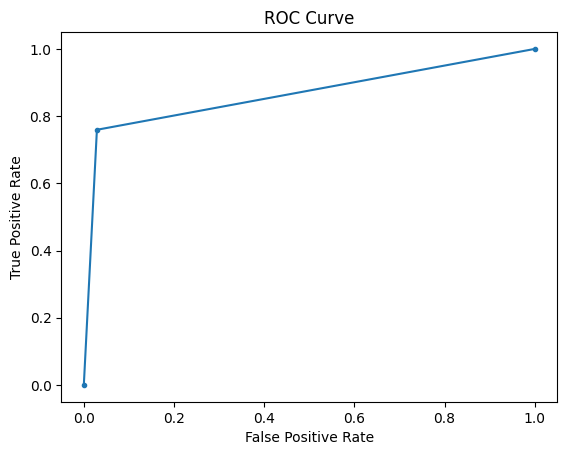

In [74]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(validation_targets, val_predictions)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

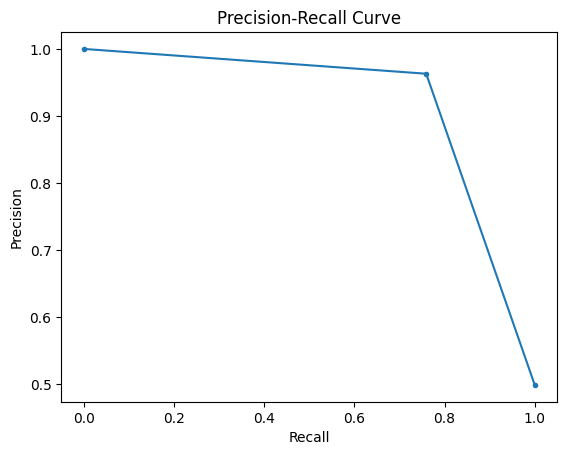

In [75]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(validation_targets, val_predictions)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Making predictions with Test Data and Validating

In [86]:
test_data = pd.read_csv("data/fraudTest.csv")
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [87]:
test_data = test_data[num_columns]
test_data.drop("Unnamed: 0",axis=1,inplace=True)
test_data

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [88]:
features_test = test_data.iloc[:, :-1]
targets_test = test_data.iloc[:,-1]

In [89]:
data_test_sclr = pd.DataFrame(
    scaler.transform(features_test),
    columns=features_test.columns)

In [91]:
test_predictions_prob = final_model.predict(data_test_sclr)
test_predictions_prob

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step


array([[0.10504447],
       [0.26175833],
       [0.04449149],
       ...,
       [0.14607611],
       [0.40439603],
       [0.04928024]], dtype=float32)

In [92]:
test_predictions_prob.shape

(555719, 1)

In [93]:
test_predictions_prob.reshape(555719)

array([0.10504447, 0.26175833, 0.04449149, ..., 0.14607611, 0.40439603,
       0.04928024], dtype=float32)

In [94]:
threshold = 0.5
test_predictions = (test_predictions_prob > threshold).astype(int).flatten()
pd.DataFrame(test_predictions).value_counts()

0
0    540208
1     15511
Name: count, dtype: int64

In [95]:
pd.DataFrame(targets_test).value_counts()

is_fraud
0           553574
1             2145
Name: count, dtype: int64

In [96]:
output_data_frame = pd.DataFrame({'Actual': targets_test, 'Prediction': test_predictions.flatten()})
output_data_frame

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555714,0,0
555715,0,0
555716,0,0
555717,0,0


### Test Dataset Performance

In [97]:
from sklearn.metrics import classification_report
print(classification_report(targets_test, test_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.10      0.74      0.18      2145

    accuracy                           0.97    555719
   macro avg       0.55      0.86      0.58    555719
weighted avg       1.00      0.97      0.98    555719



In [98]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(targets_test, test_predictions))

Confusion Matrix:
[[539646  13928]
 [   562   1583]]


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(targets_test, test_predictions)
precision = precision_score(targets_test, test_predictions)
recall = recall_score(targets_test, test_predictions)
f1 = f1_score(targets_test, test_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9739256710675719
Precision: 0.10205660499000709
Recall: 0.737995337995338
F1 Score: 0.17931581332125057


In [100]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(targets_test, test_predictions)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8564175984018679


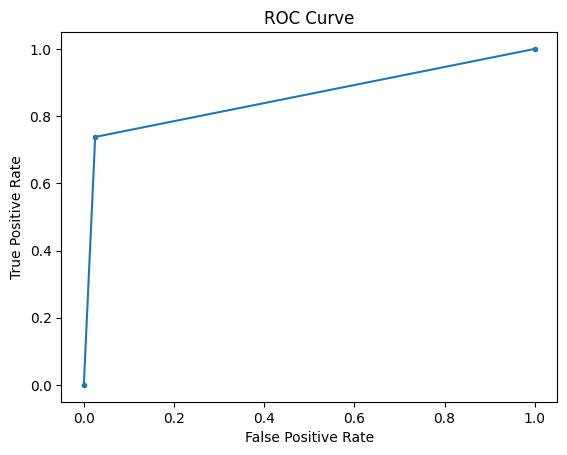

In [101]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(targets_test, test_predictions)

plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

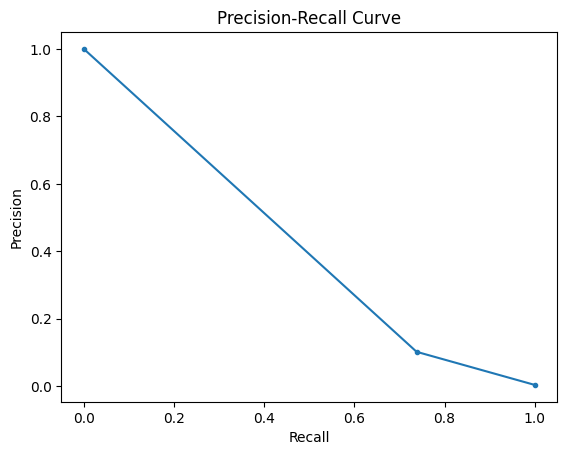

In [102]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(targets_test, test_predictions)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## ML Flow

In [43]:
import mlflow
import mlflow.keras  # Para modelos Keras


###################################### REGISTRO NO MLFLOW ################################################

# Set our tracking server URI for logging
mlflow.set_tracking_uri('http://127.0.0.1:5000')

# Configurar o MLflow para registrar a execução do RandomForestClassifier
mlflow.set_experiment('fraud_detection_experiment') # Define o nome do experimento

with mlflow.start_run():

    # Logando os parâmetros
    mlflow.log_param('epochs', 10)
    mlflow.log_param('batch_size', 32)
    mlflow.log_param('optimizer', 'adam')
    mlflow.log_param('loss_function', 'binary_crossentropy')
    
    # Logando a métrica (acurácia)
    #mlflow.log_metric('accuracy', accuracy[1])

    # Logando a arquitetura do modelo
    #model_json = model.to_json()
    #mlflow.log_artifact(model_json, 'model_architecture.json')

    # Logando o modelo (para salvar o modelo inteiro)
    mlflow.keras.log_model(model, 'fraud_detection_model')

    print("Modelo salvo com sucesso no MLflow!")

2024/12/17 18:04:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/17 18:04:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo salvo com sucesso no MLflow!
🏃 View run calm-bee-638 at: http://127.0.0.1:5000/#/experiments/270529103012719304/runs/4232eac3c1be4c369789b58d3d4f0112
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/270529103012719304
